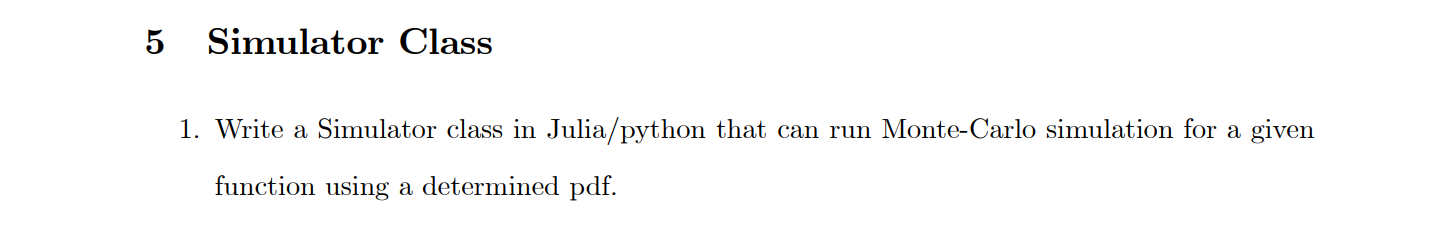

In [3]:
#required packages
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sc
import scipy.stats as stats

In [28]:
import numpy as np
from scipy.stats import norm  # Example import, your actual import may vary

class MonteCarlo:
    def __init__(self, distribution, function):
        """
        Initializes the Monte Carlo simulator.
        
        Parameters:
        - distribution: A distribution object from scipy.stats or similar, which has a .rvs() method for random variate sampling.
        - function: A function to be applied to the samples from the distribution.
        """
        self.distribution = distribution
        self.function = function
  
    def simulate(self, n):
        """
        Runs the Monte Carlo simulation.
        
        Parameters:
        - n: Number of samples to draw from the distribution.
        
        Returns:
        - The mean value of the function applied to the samples.
        """
        samples = self.distribution.rvs(size=n)
        function_values = self.function(samples)
        return np.mean(function_values)

In [4]:
distribution = stats.norm(0, 1)  
function = lambda x: x**2  
mc_simulator = MonteCarlo(distribution, function)
result = mc_simulator.simulate(10000) 
print(f"Monte Carlo Simulation Result: {result}")

Monte Carlo Simulation Result: 0.9991635986287724


Our expectation is around 1, and it's satisfied.

In [29]:
h = lambda x: x
g = stats.lognorm(0.5, 0.1)  
n = 10000
s = MonteCarlo(g, h)
simulation_result = s.simulate(n)
print(f"Monte Carlo Simulation Result: {simulation_result}")

Monte Carlo Simulation Result: 1.2326346425967238


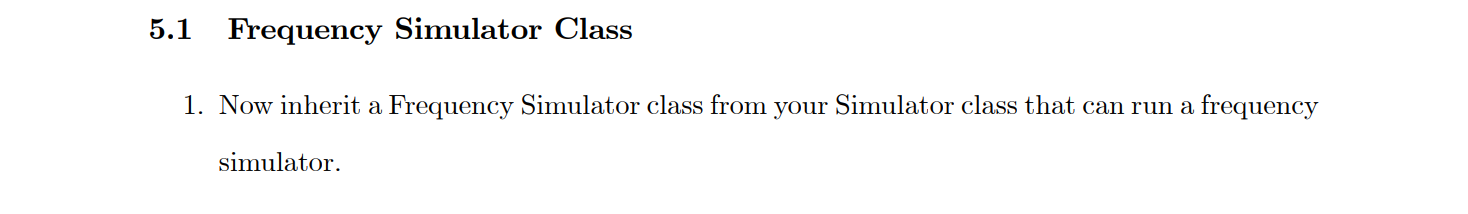

In [44]:
class FrequencySimulator(MonteCarlo):
    def simulate_frequency(self, n, interval_checker):
        
        return super().simulate(n)
a = -1
b = 1
interval_checker = lambda x: (a < x) & (x < b)
g = norm(0, 1)
s = FrequencySimulator(g, interval_checker)
result = s.simulate_frequency(n=10000, interval_checker=interval_checker)
print(f"Frequency within the interval (-1, 1): {result}")

Frequency within the interval (-1, 1): 0.6771


Drawing samples from  standard normal distribution and checking if it is in the range of our expectation( the probability of samples being between -1 and 1 is about 68\%)

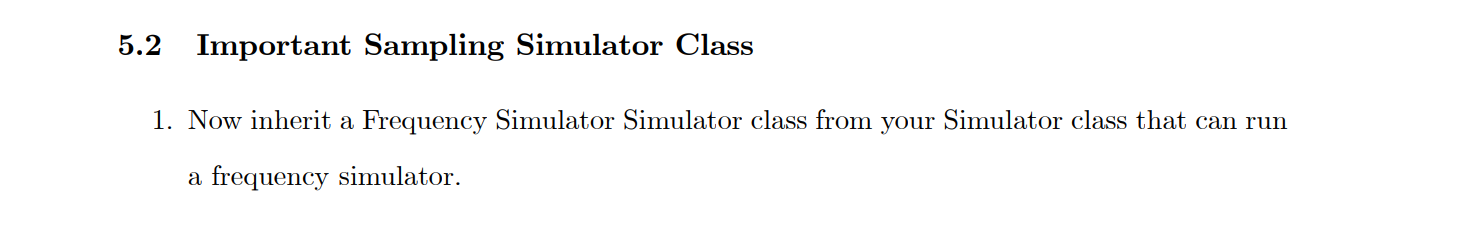

In [27]:
class ImportanceSampler(MonteCarlo):
    def simulate(self, n=1000):
        """
        Runs the Importance Sampling simulation.
        
        Parameters:
        - n: Number of samples to draw from the proposal distribution.
        
        Returns:
        - The weighted average estimate using Importance Sampling.
        """
         
        x = np.random.normal(0, 1, n)
         
        g_x = self.distribution.pdf(x)
     
        p_x = stats.norm.pdf(x)
     
        w = self.function(x) * g_x / p_x
       
        return np.mean(w)

In [26]:
h = lambda x: x  
g = stats.t(500)
s = ImportanceSampler(g, h)
# number of samples
n = 1000

# Run the Importance Sampling simulation and print the result
result = s.simulate(n)
print(f"Importance Sampling Simulation Result: {result}")

Importance Sampling Simulation Result: 0.005150132464839253


We make an object of the class and check the method using g=t and p=normal, mean is rightly calculated around 0. 